## TASK-03 SPAM SMS DETECTION

### IMPORTING THE REQUIRED LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET:

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### GETTING DATA INFORMATION:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
v1            5169 non-null object
v2            5169 non-null object
Unnamed: 2    43 non-null object
Unnamed: 3    10 non-null object
Unnamed: 4    5 non-null object
label         5169 non-null object
dtypes: object(6)
memory usage: 442.7+ KB


### REMOVING DUPLICATE VALUES:

In [6]:
rem_dupl = data.drop_duplicates(inplace=True)

### CREATING LABELS - ''HAM" & "SPAM":

In [7]:
data['label'] = data['v1'].map({'ham': 'ham', 'spam': 'spam'})

In [8]:
data['label']

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5540    spam
5541     ham
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5554     ham
5555     ham
5556     ham
5557     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5169, dtype: object

### VISUALIZING THE DATA:

Number of messages taken by category:
ham     4516
spam     653
Name: label, dtype: int64


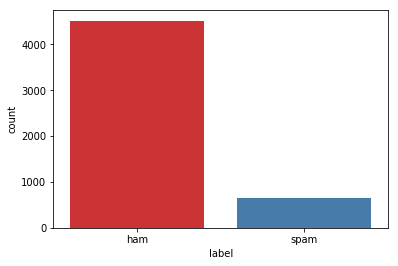

In [9]:
print("Number of messages taken by category:")
print(data['label'].value_counts())
sns.countplot(x='label', data=data, palette = 'Set1')

### EXTRACTING TEXT MESSAGES AND LABELS:

In [10]:
X = data['v2']
y = data['label']

### IMPORTING THE PACKAGES FOR TRAINING AND TESTING THE MODEL:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [13]:
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

### TRAINING & TESTING THE MODEL:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CREATING A TF-IDF VECTORIZER:

In [15]:
tfidf_vectorizer = TfidfVectorizer()

In [16]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

### TRANSFORMING THE DATA INTO TF-IDF FEATURES:

In [17]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [18]:
X_train_tfidf

<4135x7657 sparse matrix of type '<class 'numpy.float64'>'
	with 54330 stored elements in Compressed Sparse Row format>

### INITIALIZING A MULTINOMIAL NAIVE BAYES CLASSIFIER:

In [19]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### TRANSFORMING THE TESTING DATA INTO TF-IDF FEATURES:

In [20]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [21]:
X_test_tfidf

<1034x7657 sparse matrix of type '<class 'numpy.float64'>'
	with 12630 stored elements in Compressed Sparse Row format>

### PREDICTING THE LABELS FOR TEST DATA:

In [22]:
y_pred = classifier.predict(X_test_tfidf)

In [23]:
y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

### CALCULATING THE MODEL'S ACCURACY:

In [24]:
accuracy = accuracy_score(y_test, y_pred)

In [25]:
accuracy

0.9555125725338491

### GENERATING MODEL'S REPORT:

In [26]:
report = classification_report(y_test, y_pred, target_names=['Legitimate SMS', 'Spam SMS'])

In [27]:
report

'                precision    recall  f1-score   support\n\nLegitimate SMS       0.95      1.00      0.97       889\n      Spam SMS       1.00      0.68      0.81       145\n\n   avg / total       0.96      0.96      0.95      1034\n'

In [32]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.96
Classification Report:
                precision    recall  f1-score   support

Legitimate SMS       0.95      1.00      0.97       889
      Spam SMS       1.00      0.68      0.81       145

   avg / total       0.96      0.96      0.95      1034

